# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

### Решение:

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
# Функция load_boston была удалена из sklearn начиная с версии 1.2,
# поэтому мы загружаем его через OpenML с помощью функции fetch_openml.
# Используем идентификатор data_id=531, который соответствует Boston House Prices,
# Параметр as_frame=True преобразует загруженные данные сразу в DataFrame и Series.

# Загрузка набора данных Boston House Prices через OpenML
boston = fetch_openml(data_id=531, parser='auto', as_frame=True)

In [3]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = boston.data  # X содержит все признаки (features)
y = boston.target  # y содержит целевую переменную (target), т.е. цены домов

In [4]:
# Просмотр первых 5 строк датасета X (признаки)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [5]:
# Просмотр первых 5 строк датасета y (целевая переменная)
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
# Просмотр информации о датасете X (признаки)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [7]:
# Просмотр информации о датасете y (целевая переменная)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [8]:
# Просмотр статистики по каждому столбцу датасета X (признаки)
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [9]:
# Просмотр статистики целевой переменной y (целевая переменная)
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [10]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [11]:
# Масштабирование данных с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Построение модели TSNE на тренировочных данных
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

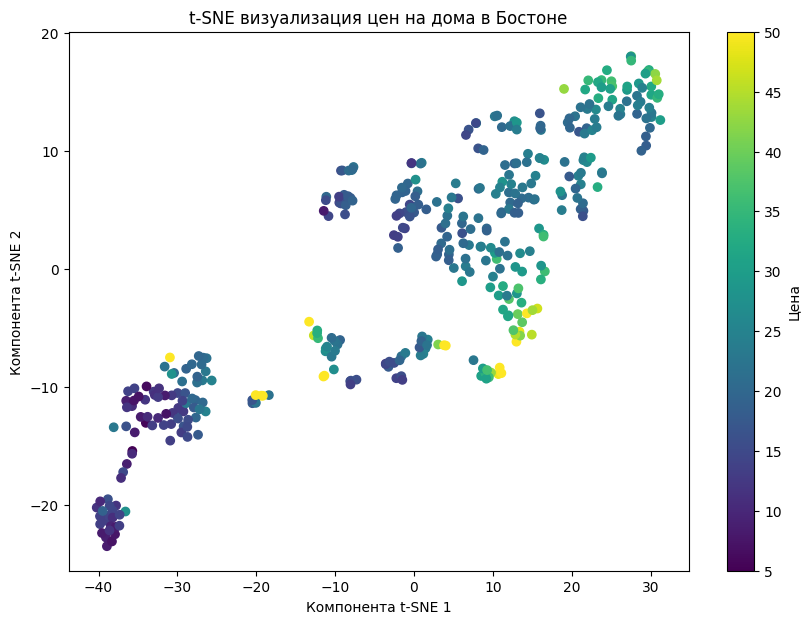

In [13]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Цена')
plt.title('t-SNE визуализация цен на дома в Бостоне')
plt.xlabel('Компонента t-SNE 1')
plt.ylabel('Компонента t-SNE 2')
plt.show()

Алгоритм t-SNE преобразовал данные о домах в двухмерное пространство, что позволило визуализировать их на графике. На графике каждая точка представляет собой дом в Бостоне, где цвет указывает на его стоимость: фиолетовые точки обозначают более доступные по цене дома, а жёлтые — более дорогие. Анализ при помощи t-SNE помог лучше понять, как различные характеристики домов влияют на их стоимость, и наглядно показать закономерности, скрытые в данных.

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

### Решение:

In [14]:
# Импортируем необходимые библиотеки для кластеризации
from sklearn.cluster import KMeans

In [15]:
# Применение KMeans для разделения данных на 3 кластера
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42, n_init=10)

In [16]:
# Применение модели KMeans к данным из тренировочного набора
clusters = kmeans.fit_predict(X_train_scaled)

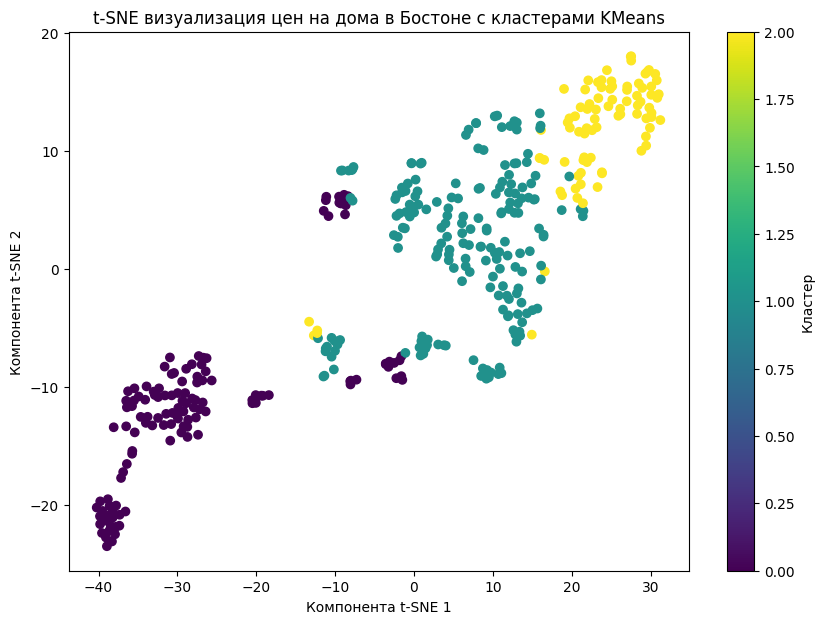

In [17]:
# Построение диаграммы рассеяния с учетом кластеров
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Кластер')
plt.title('t-SNE визуализация цен на дома в Бостоне с кластерами KMeans')
plt.xlabel('Компонента t-SNE 1')
plt.ylabel('Компонента t-SNE 2')
plt.show()

Алгоритм KMeans разделил данные на три группы, которые хорошо видны на графике после применения t-SNE — дома с разными характеристиками сгруппированы в отдельные кластеры. Фиолетовый кластер состоит из домов с более низкими характеристиками, зеленый — из домов среднего уровня, а желтый — из домов с более высокими характеристиками и, соотвественно, более высокой стоимостью. Анализ при помощи KMeans помог лучше понять сегментацию рынка недвижимости на основе характеристик домов.

In [18]:
# Добавление информации о кластерах в DataFrame для тренировочных данных
X_train_clustered = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_clustered['Cluster'] = clusters
X_train_clustered['PRICE'] = y_train.values

In [19]:
# Вычисление средних значений PRICE и CRIM в каждом кластере на тренировочных данных
cluster_means = X_train_clustered.groupby('Cluster')[['PRICE', 'CRIM']].mean()
print(cluster_means)

             PRICE      CRIM
Cluster                     
0        16.165354  0.810904
1        24.958115 -0.359594
2        27.788372 -0.398864


Результаты показывают, что средние значения цены дома и уровня преступности сильно различаются между кластерами. Кластер 0 объединяет дома с низкой стоимостью и высоким уровнем преступности, кластер 1 — дома со средней стоимостью и умеренным уровнем безопасности, а кластер 2 — самые дорогие дома в безопасных районах.

## *Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

### Решение:

In [20]:
# Применение модели KMeans к данным из тестового набора
test_clusters = kmeans.predict(X_test_scaled)

In [21]:
# Добавление информации о кластерах в DataFrame для тестовых данных
X_test_clustered = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_clustered['Cluster'] = test_clusters
X_test_clustered['PRICE'] = y_test.values

In [22]:
# Вычисление средних значений PRICE и CRIM в каждом кластере на тестовых данных
test_cluster_means = X_test_clustered.groupby('Cluster')[['PRICE', 'CRIM']].mean()
print(test_cluster_means)

             PRICE      CRIM
Cluster                     
0        16.437143  0.739661
1        21.860784 -0.377146
2        31.350000 -0.400162


Результаты на тестовых данных подтверждают ту же тенденцию, что и на тренировочных: модель KMeans эффективно разделяет дома на три группы с различными уровнями цен и уровнем преступности. Кластер 0 объединяет менее дорогие дома с высоким уровнем преступности, кластер 1 — дома среднего уровня с умеренной безопасностью, а кластер 2 — самые дорогие и безопасные дома. Это говорит о том, что модель KMeans может стабильно выделять сегменты на рынке недвижимости, даже на новых данных.